In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline

import keras 
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils 
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [2]:
root = 'C://Users//metec//OneDrive//Masaüstü//Udemy_DerinOgrenmeyeGiris-master//Evrisimli_Sinir_Aglari//Duygu_Tanima//'
data = pd.read_csv(root + "data//fer2013//fer2013.csv")
data.shape

(35887, 3)

In [3]:
#datanın belli bir kısmını görmekteyiz
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
#eğitim ve test performansının çlçükldüğü veri sayılarını inceleyelim
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [5]:
#eğitim için kullanmakta olduğumuz Training kısmında kaç örnek olduğunu bastırıyoruz.
np.unique(data["Usage"].values.ravel())
print('Eğitim verisetindeki örnek sayısı: %d' %(len(data[data.Usage == "Training"])))

Eğitim verisetindeki örnek sayısı: 28709


In [6]:
#eğitim örneklerinin piksel değerleri tablo halinde verildiğinden dolayı boşlukları parse ederek liste olarak değişikene aldık
train_data = data[data.Usage == "Training"]
train_pixels = train_data.pixels.str.split(" ").tolist()
train_pixels = pd.DataFrame(train_pixels, dtype = int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

C:\Users\metec\AppData\Local\Temp\ipykernel_28272\220273163.py:4: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  train_pixels = pd.DataFrame(train_pixels, dtype = int)


[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


C:\Users\metec\AppData\Local\Temp\ipykernel_28272\220273163.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_images = train_images.astype(np.float)


In [7]:
#Görüntüyü 48x48 piksel şeklinde göstermek için fonskiyon tanımlayalım

def show(img):
    show_image = img.reshape(48 , 48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap = 'gray')

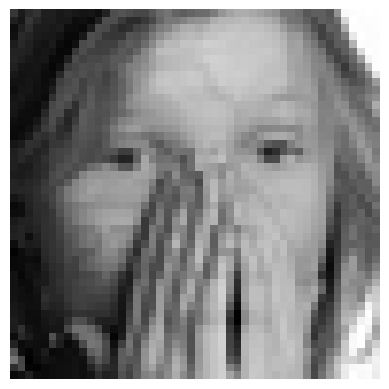

In [8]:
#veri kümesinden 
show(train_images[45])

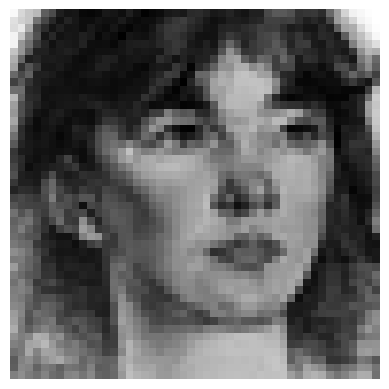

In [9]:
#veri kümesinden 
show(train_images[31])

In [10]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('farklı yüz ifadelerinin sayısı: %d' %train_labels_count)

farklı yüz ifadelerinin sayısı: 7


In [11]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes 
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [12]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


In [13]:
np.unique(data["Usage"].values.ravel())
print('test verisetindeki örnek sayısı:%d' %(len(data[data.Usage == 'PublicTest'])))

test verisetindeki örnek sayısı:3589


In [14]:
#eğitim örneklerinin piksel değerleri tablo halinde verildiğinden dolayı boşlukları parse ederek liste olarak değişikene aldık
test_data = data[data.Usage == 'PublicTest']
test_pixels = test_data.pixels.str.split(" ").tolist()
test_pixels = pd.DataFrame(test_pixels, dtype = int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images.shape)

C:\Users\metec\AppData\Local\Temp\ipykernel_28272\2933485458.py:4: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  test_pixels = pd.DataFrame(test_pixels, dtype = int)


(3589, 2304)


C:\Users\metec\AppData\Local\Temp\ipykernel_28272\2933485458.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_images = test_images.astype(np.float)


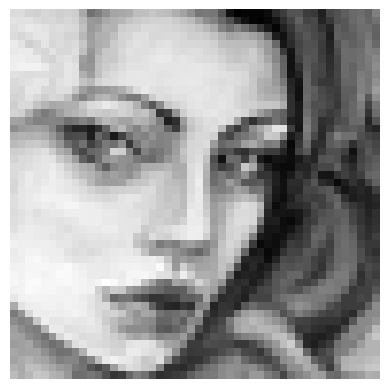

In [15]:
show(test_images[7])

In [16]:
#onehot ile test kümesindeki verilerin her birisine düşen  sınıfı yani eğitim işlemi boyutunu görelim
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)
y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


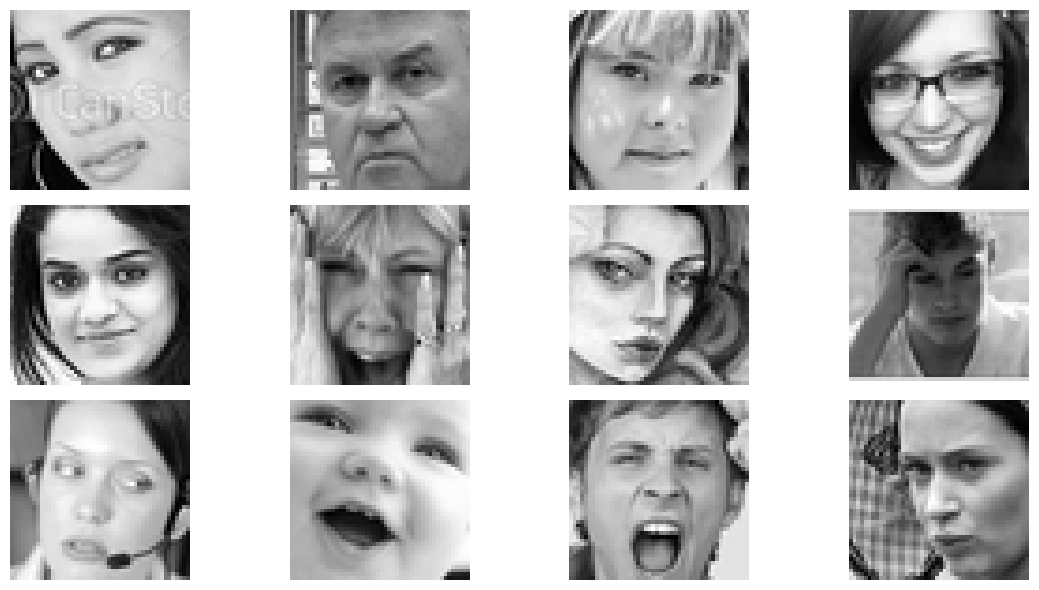

In [17]:
#test verisetinden örneklerden birkaçını toplu halde görelimn

plt.figure(0, figsize = (12,6))
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.axis('off')
    
    image = test_images[i].reshape(48,48)
    plt.imshow(image, cmap= "gray")
plt.tight_layout()
plt.show()

In [18]:

#Derin Evrişimli Bir Sinir Ağı Modeli Tanımlanması
model = Sequential()

#1.katman
model.add(Conv2D(64, 3, data_format='channels_last', kernel_initializer='he_normal', input_shape = (48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2.katman
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
model.add(Dropout(0.6)) #Unutma işlemi %60 (nöron silme-dropout) 
          
#3.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4.katman   
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5.katman          
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
model.add(Dropout(0.6)) #Unutma işlemi %60 (nöron silme-dropout) 
          
#TAM BAĞLANTI KATMANI
model.add(Flatten()) #vektör haline çevirme 
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6)) #Unutma işlemi %60 (nöron silme-dropout) 

#Çıkış KATMANI
model.add(Dense(7))
model.add(Activation('softmax')) #sınıflama işlemi 7 duygu sınfı var
          
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #optimizasyon ve başarım hesaplama metriklerinin belirlenmesi
model.summary() #modelin özetini görselleştirelim       

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 44, 44, 64)        0

In [19]:
#eğitim ve test kümelerinin eleman sayısı, yükseklik ve genişlik, kanalsayısı bilgilerini ekrana yazdıralım
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print("Train:", x_train.shape)
print("Test:", x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


In [20]:
#eğitim ve test kümelerinin eleman ve duygu sınıf sayısı
print("Train:", y_train.shape)
print("Test:", y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


In [21]:
#En başarılı ağırlıkları kaydedelim
checkpointer = ModelCheckpoint(filepath = root + 'data//face_model.h5', verbose = 1, save_best_only= True )

epochs = 10
batchSize = 100

#Modeli Çalıştır
hist=model.fit(x_train, y_train,
              epochs = epochs,
              shuffle = True,
              batch_size = batchSize,
              validation_data = (x_test,y_test),
              callbacks = [checkpointer], verbose = 2)
#save model to json
mode_json = model.to_json()
with open (root + "data//face_model.json", "w") as json_file:
    json_file.write(mode_json)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.54417, saving model to C://Users//metec//OneDrive//Masaüstü//Udemy_DerinOgrenmeyeGiris-master//Evrisimli_Sinir_Aglari//Duygu_Tanima//data\face_model.h5
288/288 - 207s - loss: 1.9670 - accuracy: 0.2783 - val_loss: 1.5442 - val_accuracy: 0.4009 - 207s/epoch - 719ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.54417 to 1.43212, saving model to C://Users//metec//OneDrive//Masaüstü//Udemy_DerinOgrenmeyeGiris-master//Evrisimli_Sinir_Aglari//Duygu_Tanima//data\face_model.h5
288/288 - 175s - loss: 1.6001 - accuracy: 0.3760 - val_loss: 1.4321 - val_accuracy: 0.4374 - 175s/epoch - 609ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.43212 to 1.35643, saving model to C://Users//metec//OneDrive//Masaüstü//Udemy_DerinOgrenmeyeGiris-master//Evrisimli_Sinir_Aglari//Duygu_Tanima//data\face_model.h5
288/288 - 175s - loss: 1.4813 - accuracy: 0.4277 - val_loss: 1.3564 - val_accuracy: 0.4815 - 175s/epoch - 609ms/step
Epoch 4/10

Epoch 4: val_l

<function matplotlib.pyplot.show(close=None, block=None)>

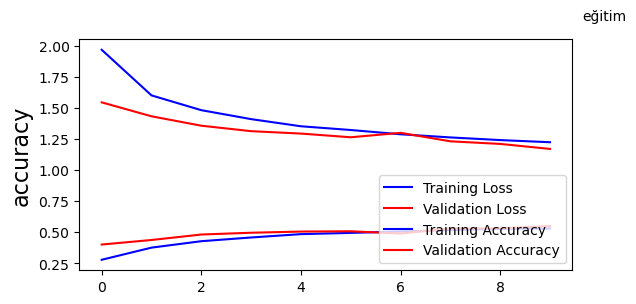

In [22]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle('eğitim', fontsize=10)
plt.ylabel('loss', fontsize=16)
plt.plot(hist.history['loss'],color='b', label = 'Training Loss')
plt.plot(hist.history['val_loss'], color= 'r', label = 'Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,1)
plt.ylabel('accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show

In [23]:
test = data [["emotion", "pixels"]] [data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep= ' '))
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [24]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [25]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [26]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest üzerindeki doğruluk durumu:", score)

PrivateTest üzerindeki doğruluk durumu: [1.1648600101470947, 0.5586514472961426]


In [27]:
#Farklı görüntülerle test işlemi yapıp sonuçları görselleştirelim 
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [28]:
#en iyi ağırlıkları yükle
model_best = load_model(root + 'data//face_model.h5')

In [31]:
#test_image=x_test_private[60] eğer veri kümesinden bir görsel denemek istersek [] içine rastgele bir görsel numarası atarak test edebiliriz.
image_path = root + "images//kemal_sunal2.jpg"
test_image_orjinal = Image.open(image_path) #orjinal renkli görüntü

test_image = Image.open(image_path).convert('L').resize((48,48))
test_data = np.expand_dims(test_image, axis=0)
test_data = np.vstack([test_data])

results = model_best.predict(test_data, batch_size=1)
results

1/1 [==============================] - 0s 24ms/step


array([[0.0594691 , 0.00148554, 0.04196884, 0.5153912 , 0.11238451,
        0.00689715, 0.26240367]], dtype=float32)

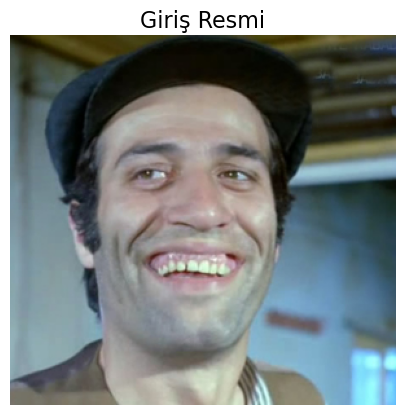

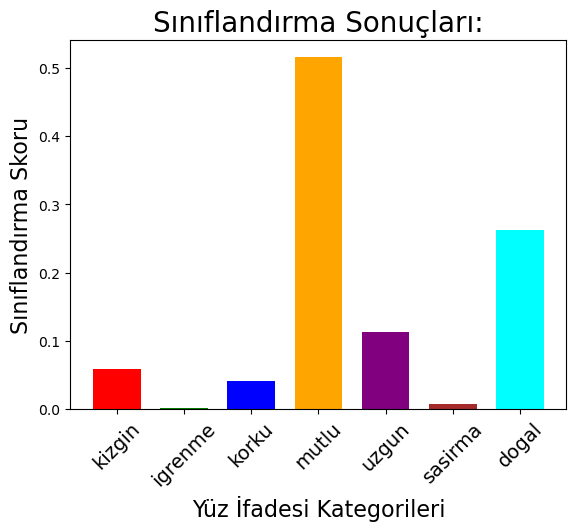

Sınıflandırma sonucu en yüksek oranla: mutlu


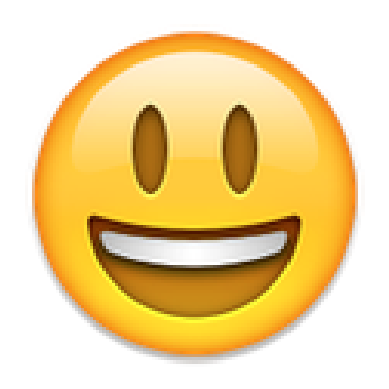

In [32]:
#7 adet duygu durumu
class_names = ['kizgin', 'igrenme', 'korku', 'mutlu', 'uzgun', 'sasirma', 'dogal']

ind = 0.1406*np.arange(len(class_names))
width = 0.4 #bar genişliği

color_list = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'cyan']

#test resmimizi çizdirelim
plt.imshow(test_image_orjinal)
plt.title('Giriş Resmi', fontsize = 16)
plt.axis('off')
plt.show()

#sonıçlarımızı renklendirelim
width = 0.1
for i in range(len(class_names)):
    plt.bar(ind[i], results[0][i], width, color = color_list[i])
    
plt.title("Sınıflandırma Sonuçları:", fontsize = 20)
plt.xlabel("Yüz İfadesi Kategorileri", fontsize=16)
plt.ylabel("Sınıflandırma Skoru", fontsize =16)
plt.xticks(ind, class_names, rotation = 45, fontsize=14)
plt.show()

print("Sınıflandırma sonucu en yüksek oranla:", class_names[np.argmax(results)])

emojis_img = Image.open(root + 'images//emojis//%s.png' % str(class_names[np.argmax(results)]))

plt.imshow(emojis_img)
plt.axis('off')
plt.show()